In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.facecolor'] = '#FFC72C'

In [2]:
daily_df = pd.read_csv('daily_sales.csv')
monthly_df = pd.read_csv('monthly_sales.csv')
daily_cols = daily_df.columns.values
daily_cols[0] = 'Day of Week'
daily_cols[1] = 'Date'
daily_df.columns = daily_cols
daily_df['Date'] = pd.to_datetime(daily_df['Date'], format="%m/%d/%Y")
monthly_df.rename(columns={'Month, Year': 'Month'}, inplace = True)
monthly_df['Month'] = pd.to_datetime(monthly_df['Month'], format="%b-%y")

In [3]:
renames = dict(zip(
    ['HM-NE','CF-NE','FF-NE','HM-SW','CF-SW','FF-SW','HM-NW',
     'CF-NW','FF-NW','HM-SE','CF-SE','FF-SE','HM-C','CF-C','FF-C'],
    ['Hamburger-NorthEast','ChickenFillet-NorthEast','FishFillet-NorthEast','Hamburger-SouthWest',
     'ChickenFillet-SouthWest','FishFillet-SouthWest','Hamburger-NorthWest','ChickenFillet-NorthWest',
     'FishFillet-NorthWest','Hamburger-SouthEast','ChickenFillet-SouthEast','FishFillet-SouthEast',
     'Hamburger-Central','ChickenFillet-Central','FishFillet-Central']
))

In [4]:
daily_df.rename(columns=renames, inplace=True)
monthly_df.rename(columns=renames, inplace=True)

In [5]:
daily_df.head()

,Day of Week,Date,Hamburger-NorthEast,ChickenFillet-NorthEast,FishFillet-NorthEast,Hamburger-SouthWest,ChickenFillet-SouthWest,FishFillet-SouthWest,Hamburger-NorthWest,ChickenFillet-NorthWest,FishFillet-NorthWest,Hamburger-SouthEast,ChickenFillet-SouthEast,FishFillet-SouthEast,Hamburger-Central,ChickenFillet-Central,FishFillet-Central
0,Friday,2016-01-01,37240,16077,8446,39249,16565,10204,37271,16819,9924,35967,13955,11734,35689,13499,11232
1,Saturday,2016-01-02,36258,14726,7950,38106,14003,7316,35021,14705,9028,36398,15089,8005,37178,14256,9152
2,Sunday,2016-01-03,37007,15103,8397,35494,15987,8683,35369,16591,8105,34864,13919,7011,35855,15557,8406
3,Monday,2016-01-04,37590,16413,9537,33666,15114,8429,37993,14535,8034,36601,14528,8201,36168,15699,7940
4,Tuesday,2016-01-05,38036,16199,10123,33528,13721,10085,37854,14590,9879,36661,15132,8874,36837,15420,8607


In [6]:
monthly_df.head()

,Month,Hamburger-NorthEast,ChickenFillet-NorthEast,FishFillet-NorthEast,Hamburger-SouthWest,ChickenFillet-SouthWest,FishFillet-SouthWest,Hamburger-NorthWest,ChickenFillet-NorthWest,FishFillet-NorthWest,Hamburger-SouthEast,ChickenFillet-SouthEast,FishFillet-SouthEast,Hamburger-Central,ChickenFillet-Central,FishFillet-Central
0,2016-01-01,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619
1,2016-02-01,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586
2,2016-03-01,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523
3,2016-04-01,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533
4,2016-05-01,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695


### macro

In [7]:
monthly_df['Hamburger Total'] = monthly_df[[cname for cname in monthly_df.columns if 'Hamburger' in cname]].sum(axis=1)
monthly_df['ChickenFillet Total'] = monthly_df[[cname for cname in monthly_df.columns if 'ChickenFillet' in cname]].sum(axis=1)
monthly_df['FishFillet Total'] = monthly_df[[cname for cname in monthly_df.columns if 'FishFillet' in cname]].sum(axis=1)

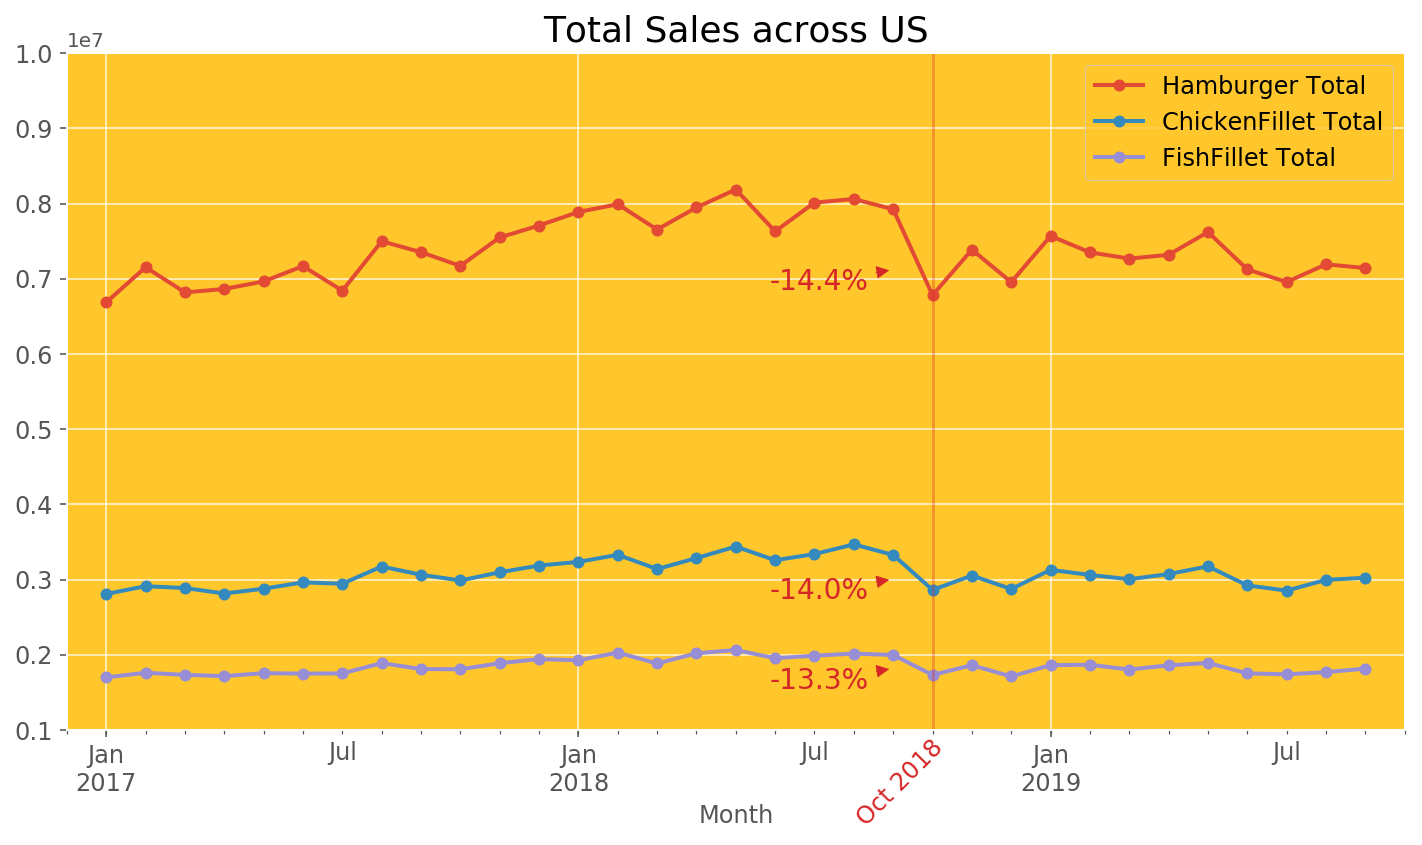

In [8]:
df = monthly_df[monthly_df.Month.dt.year > 2016].set_index('Month') \
    [[cname for cname in monthly_df.columns if 'Total' in cname]]
df.plot(figsize=(10, 6), linewidth=2.0, style='.-', markersize=10, fontsize='large')
plt.title('Total Sales across US', fontsize=18)
plt.axvline(x=pd.to_datetime('Oct-18', format="%b-%y"), c='tab:red', alpha=0.3)
plt.legend(fontsize='large')
for y, margin in list(zip(df.iloc[21].values, (df.iloc[21] - df.iloc[20]) / df.iloc[20])):
    plt.annotate(
        "{:.1%}".format(margin), (pd.to_datetime('2018-09-30'), y*1.05), color='tab:red', xytext=(-62, -10),
        textcoords='offset points', arrowprops={'arrowstyle': '-|>', 'color':'tab:red'}, size=14
    )
plt.annotate('Oct 2018', (pd.to_datetime('2018-10-01'), 0.11e7), color='tab:red',
             xytext=(-40, -16), textcoords='offset points', rotation=45, fontsize='large')
plt.grid(True, alpha=0.8)
plt.xlim(pd.to_datetime(['2016-12-01', '2019-10-01']))
plt.ylim((0.1e7, 1e7))
plt.tight_layout()
plt.savefig('macro.svg', transparent=True)
plt.show()

From the total sales across the US from each product, we can see that there has been a steady increase of sales for all of our products. In October 2018, when Burger King releases their Impossible Burger, sales plummeted with a decline of around 14% across all our products compared to last month. After the downfall, sales have been staying at the same level.

### micro

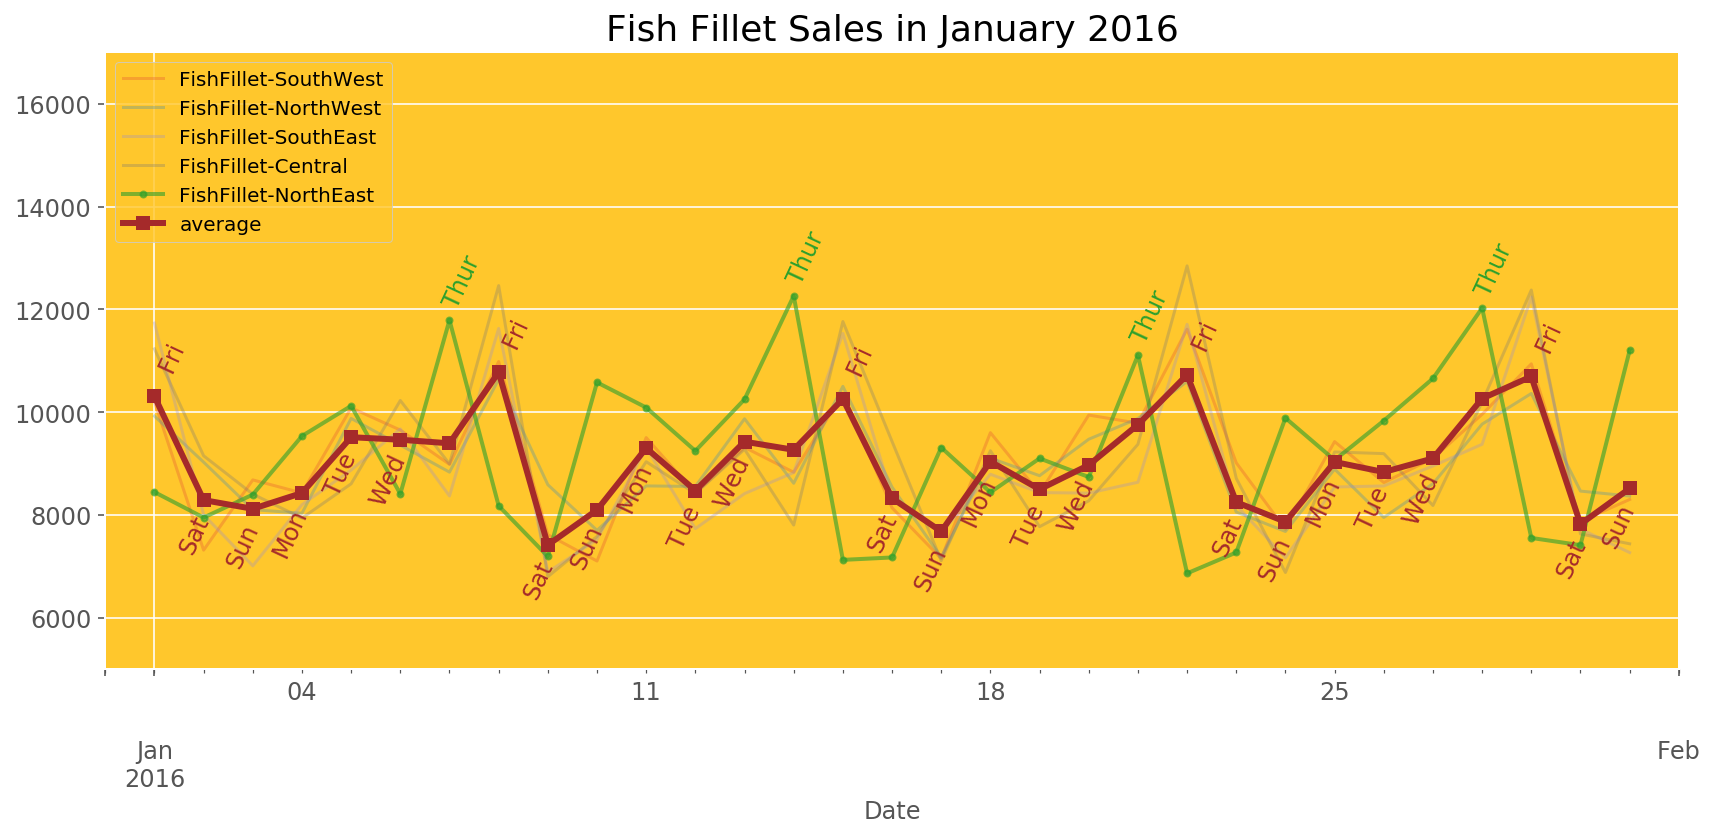

In [9]:
df = daily_df.set_index('Date')[[cname for cname in daily_df.columns if 'Fish' in cname]]
df.drop(columns='FishFillet-NorthEast').plot(figsize=(12, 6), alpha=0.3, fontsize='large')
df['FishFillet-NorthEast'].plot(linewidth=2.0, style='.-', alpha=0.6, fontsize='large', c='tab:green')
df['average'] = df.sum(axis=1) / df.shape[1]
df['average'].plot(linewidth=3.0, style='-', marker='s', markersize=6, color='brown')
for k, v in df['average'].iteritems():
    if k.day_name() in ['Thursday']: continue
    if k.day_name() not in ['Friday']:
        plt.annotate(
            k.day_name()[:3], (k, v), color='brown', rotation=65, size='large',
            xytext=(5, -15), textcoords='offset points', horizontalalignment='right',
        )
    else:
        plt.annotate(
            k.day_name()[:3], (k, v), color='brown', rotation=65, size='large',
            xytext=(0, 20), textcoords='offset points', horizontalalignment='left',
        )
for k, v in df['FishFillet-NorthEast'].iteritems():
    if k.day_name() in ['Thursday']:
        plt.annotate(
            k.day_name()[:4], (k, v), color='tab:green', rotation=65, size='large',
            xytext=(-5, 25), textcoords='offset points', horizontalalignment='left',
        )
plt.legend(loc='upper left')
plt.title('Fish Fillet Sales in January 2016', fontsize=18)
plt.ylim((5000, 17000))
plt.xlim(pd.to_datetime(['2015-12-31', '2016-02-01']))
plt.tight_layout()
plt.savefig('micro.svg', transparent=True)
plt.show()

In terms of micro trends, we see something interesting from fish fillet sales. On average, we see a steady incline throughout the week beginning from Saturday to a peak on Friday. But in the north east, sales are the most on Thursdays and endured a sudden drop on the days after. The overall pattern for north east is shifted one day before compared to the overall pattern.

### Geographical

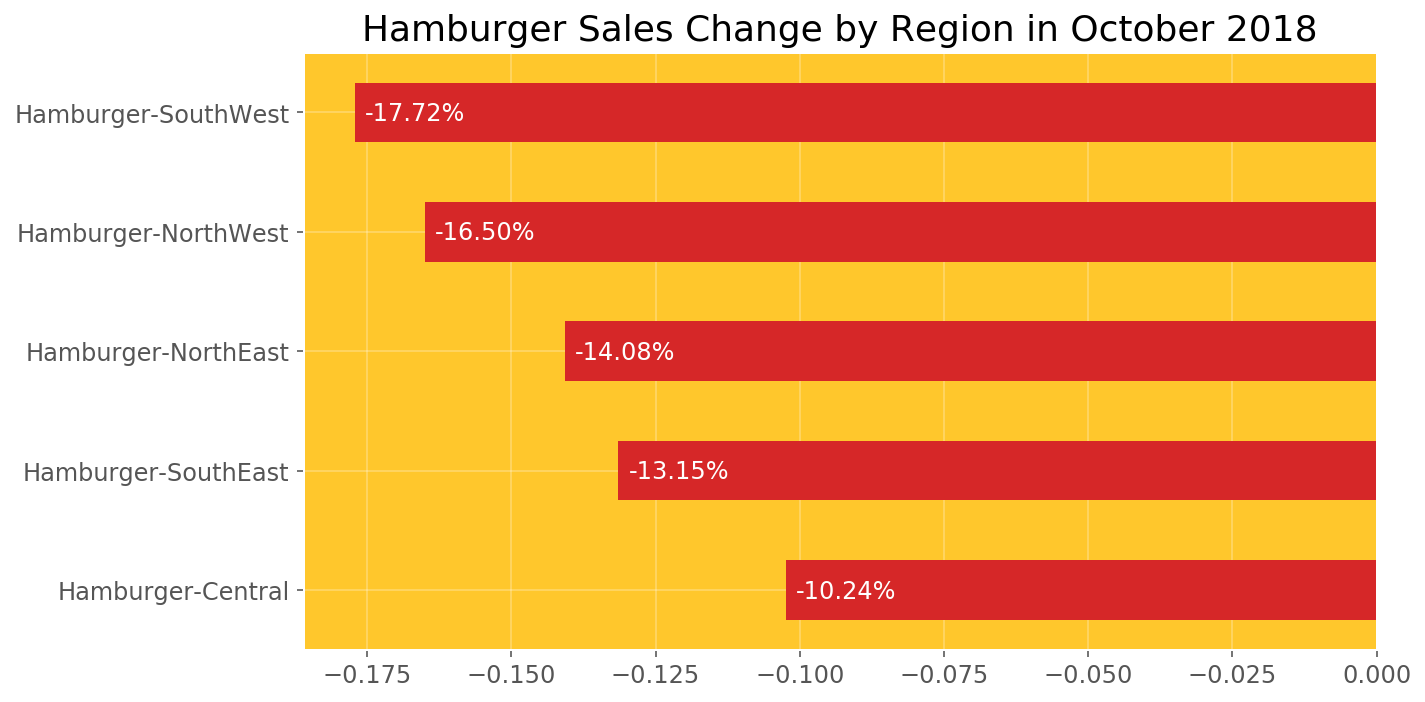

In [10]:
df = monthly_df[monthly_df.Month.dt.year > 2016].set_index('Month') \
    [[cname for cname in monthly_df.columns if 'Hamburger' in cname and 'Total' not in cname]]
margin = ((df.iloc[21] - df.iloc[20]) / df.iloc[20]).sort_values(ascending=False)
margin.plot(figsize=(10, 5), kind='barh', color='tab:red', fontsize='large')
plt.title('Hamburger Sales Change by Region in October 2018', fontsize=18)
plt.grid(alpha=0.3)
for idx, value in enumerate(list(margin)):
    plt.annotate(
        "{:.2%}".format(value), (value, idx), color='white',
         xytext=(5, -4), textcoords='offset points', fontsize='large'
    )

plt.tight_layout()
plt.savefig('geo_hamburger.svg', transparent=True)
plt.show()

Because hamburger sales attribute to the largest proportions of our sales, we want to investigate which part of the US suffered the most from the introduction of Impossible Burgers on October 2018. Areas along the west coast have the most impact.

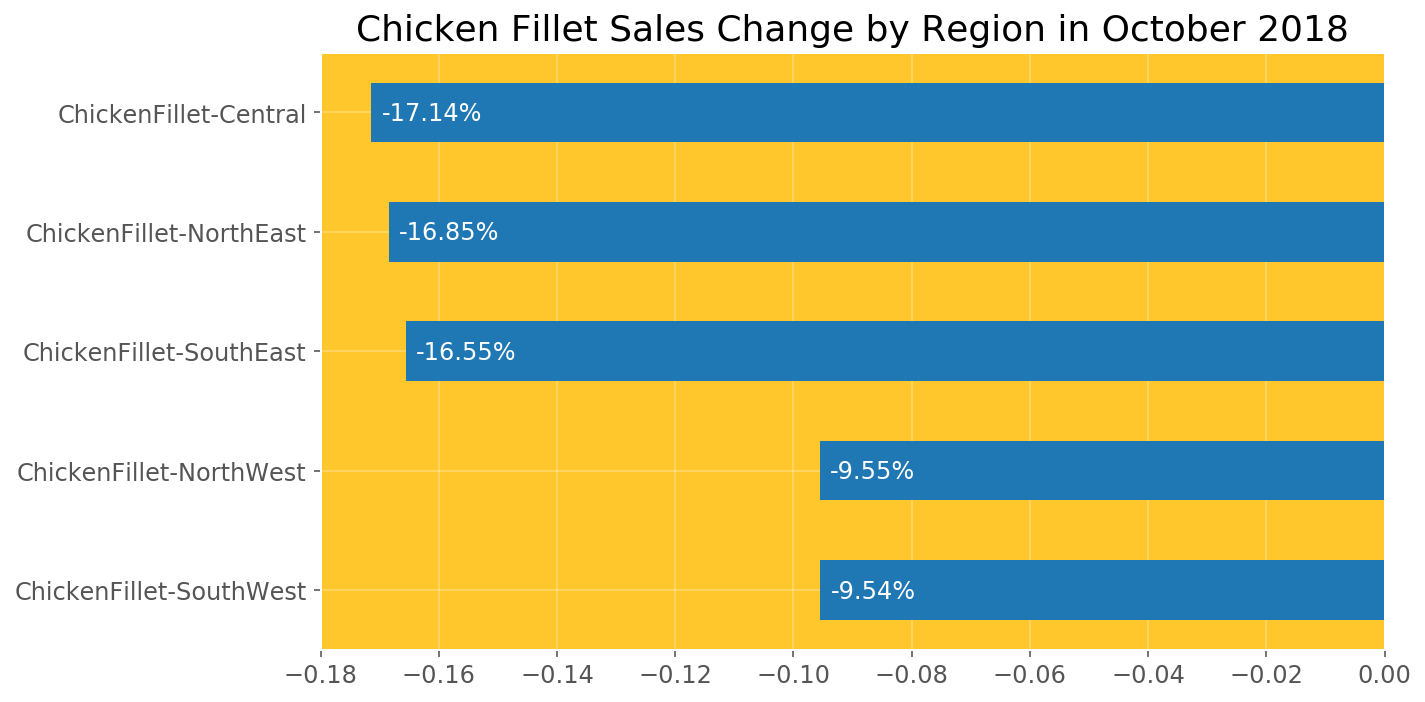

In [11]:
df = monthly_df[monthly_df.Month.dt.year > 2016].set_index('Month') \
    [[cname for cname in monthly_df.columns if 'Chicken' in cname and 'Total' not in cname]]
margin = ((df.iloc[21] - df.iloc[20]) / df.iloc[20]).sort_values(ascending=False)
margin.plot(figsize=(10, 5), kind='barh', color='tab:blue', fontsize='large')
plt.title('Chicken Fillet Sales Change by Region in October 2018', fontsize=18)
plt.grid(alpha=0.3)
for idx, value in enumerate(list(margin)):
    plt.annotate(
        "{:.2%}".format(value), (value, idx), color='white',
         xytext=(5, -4), textcoords='offset points', fontsize='large'
    )

plt.tight_layout()
plt.savefig('geo_chickenfillet.svg', transparent=True)
plt.show()

Meanwhile, for the west coast, chicken fillet sales on October were relatively suffered less decline. We can infer that for people in the west coast who regularly purchase chicken fillet, they have been relatively loyal to their preferences, but for those who prefer hamburgers in the past, they are happy to try out new products from Burger King.

In [12]:
df = monthly_df.drop(columns=[c for c in monthly_df.columns if 'Total' in c])
for region in ['NorthEast', 'SouthWest', 'NorthWest', 'SouthEast', 'Central']:
    df[f'{region} Total'] = df[[c for c in df.columns if region in c]].sum(axis=1)
df = df[df.Month.dt.year > 2016].set_index('Month') \
    [[cname for cname in df.columns if 'Total' in cname]]
margin = ((df.iloc[21] - df.iloc[20]) / df.iloc[20]).sort_values(ascending=False)
margin

Central Total     -0.120156
SouthEast Total   -0.140224
NorthWest Total   -0.143011
NorthEast Total   -0.146907
SouthWest Total   -0.155493
dtype: float64